## Importing Modules

In [1]:
import nltk
import pandas as pd
;

''

## Reading the Data From Text files

In [3]:
messeges=[line.strip() for line in open('F:/IR/CISI.ALL') ]

In [4]:
with open('F:/IR/CISI.ALL') as CISI_file:
    lines = ""
    for l in CISI_file.readlines():
        lines += "\n" + l.strip() if l.startswith(".") else " " + l.strip()
    lines = lines.lstrip("\n").split("\n")
    
# print n lines
n = 5
for l in lines[:n]:
    print(l)

.I 1
.T 18 Editions of the Dewey Decimal Classifications
.A Comaromi, J.P.
.W The present study is a history of the DEWEY Decimal Classification.  The first edition of the DDC was published in 1876, the eighteenth edition in 1971, and future editions will continue to appear as needed.  In spite of the DDC's long and healthy life, however, its full story has never been told.  There have been biographies of Dewey that briefly describe his system, but this is the first attempt to provide a detailed history of the work that more than any other has spurred the growth of librarianship in this country and abroad.
.X 1	5	1 92	1	1 262	1	1 556	1	1 1004	1	1 1024	1	1 1024	1	1


## Coverting Document into Dictionary

In [27]:
doc_set = {}
doc_id = ""
doc_text = ""
for l in lines:
    if l.startswith(".I"):
        doc_id = l.split(" ")[1].strip()
    elif l.startswith(".X"):
        doc_set[doc_id] = doc_text.lstrip(" ")
        doc_id = ""
        doc_text = ""
    else:
        doc_text += l.strip()[3:] + " " # The first 3 characters of a line can be ignored.

# Print something to see the dictionary structure, etc.
print(f"Number of documents = {len(doc_set)}" + ".\n")
print(doc_set["1000"]) # note that the dictionary indexes are strings, not numbers.

Number of documents = 1460.

Serial Cataloging Problems: Rules of Entry and Definition of Title Simonton, Wesley Alternatives to the present rule for entry of serials in the Anglo-American Cataloging Rules (AACR) are identified and arguments relating to the concept of authorship for serials are summarized.. The varying concepts of "title" in AACR, the International Serials Data System, and ISBD(S): International Standard Bibliographic Description for Serials are compared and the next steps relating to code revision and attempts at international agreement are described.. 


## Shapigng the Ducumnets into Dataframe 

In [28]:
df1=pd.DataFrame()
df1['Doc_Id']=doc_set.keys()
df1['Documents']=doc_set.values()

## Reading Qeuries Data into a Dictionary

In [29]:
with open('F:/IR/CISI.QRY') as f:
    lines = ""
    for l in f.readlines():
        lines += "\n" + l.strip() if l.startswith(".") else " " + l.strip()
    lines = lines.lstrip("\n").split("\n")
    
qry_set = {}
qry_id = ""
for l in lines:
    if l.startswith(".I"):
        qry_id = l.split(" ")[1].strip()
    elif l.startswith(".W"):
        qry_set[qry_id] = l.strip()[3:]
        qry_id = ""
    
# Print something to see the dictionary structure, etc.
print(f"Number of queries = {len(qry_set)}" + ".\n")
print(qry_set["3"]) # note that the dictionary indexes are strings, not numbers. 

Number of queries = 112.

What is information science?  Give definitions where possible.


## Coverting Qeuries Data Into Dataframe

In [30]:
df2=pd.DataFrame()
df2['Q_Id']=qry_set.keys()
df2['Query']=qry_set.values()
df2.head()

,Q_Id,Query
0,1,What problems and concerns are there in making...
1,2,"How can actually pertinent data, as opposed to..."
2,3,What is information science? Give definitions...
3,4,Image recognition and any other methods of aut...
4,5,What special training will ordinary researcher...


## Reading Cross Matching Data 

In [31]:
rel_set = {}
with open('F:/IR/CISI.REL') as f:
    for l in f.readlines():
        qry_id = l.lstrip(" ").strip("\n").split("\t")[0].split(" ")[0]
        doc_id = l.lstrip(" ").strip("\n").split("\t")[0].split(" ")[-1]
        if qry_id in rel_set:
            rel_set[qry_id].append(doc_id)
        else:
            rel_set[qry_id] = []
            rel_set[qry_id].append(doc_id)
        if qry_id == "7":
            print(l.strip("\n"))
     

     7    310	0	0.000000
     7    320	0	0.000000
     7    332	0	0.000000
     7    375	0	0.000000
     7    376	0	0.000000
     7    645	0	0.000000
     7    724	0	0.000000
     7    725	0	0.000000


## Making Dataframe of Resuts

In [32]:
import numpy as np
df3=pd.DataFrame()
df3['Q_Id']=rel_set.keys()
df3['Doc_Ids']=rel_set.values()
lis=[]
for i in df3['Doc_Ids']:
    lis.append(list(map(int, i)))
df3['Doc_Ids']=lis
import numpy as np
lis=[]
for i in df3['Q_Id']:
    lis.append(int(i))
df3['Q_Id']=lis

## Text Pre-Processing 

# Removing Punctuatuion marks

In [33]:
import string
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Removing stopwords

In [35]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Making the Function of This Text Pre-Processing

In [36]:
def cleaner(mess):
    """
    1.Reomve Punctuation
    2.Remove Stopwords
    3.Retuen a clean String
    """
    nopunc=[word for word in mess if word not in string.punctuation]
    nopunc="".join(nopunc)
    clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

# Vectorization 

#### Applying Our Analyzer with Countvectorizer to Make Bag of Words

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer= CountVectorizer(analyzer=cleaner).fit(df1['Documents'])
print(len(bow_transformer.vocabulary_))

14436


### Trannsforming 

In [38]:
docs_bow=bow_transformer.transform(df1['Documents'])

In [39]:
print(docs_bow.shape)
docs_bow.nnz         # Non Zeroes entries 

(1460, 14436)


90569

# Term Document Matrix (TF-IDF)

In [40]:
from sklearn.feature_extraction.text  import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(docs_bow)

In [41]:
docs_tfidf=tfidf_transformer.transform(docs_bow)

In [42]:
print(docs_tfidf.shape)

(1460, 14436)


# Search Engine 

# Cosine Similarity Of Two Vectors

### 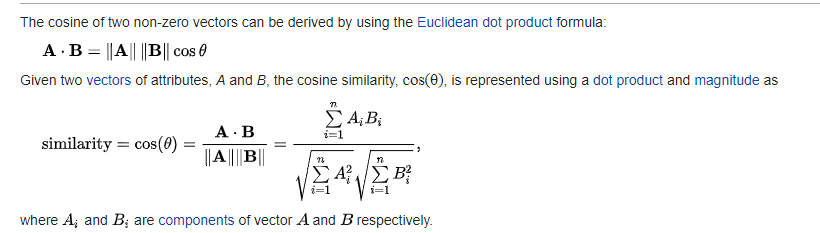

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

### Compelete Search Engine 

In [44]:
def Res(Quer,Docs=df1["Documents"]): # It will accept Query 
    results=[]                       #Cosine_Simlarity with a Document Number 
    quer_vect=bow_transformer.transform([Quer])
    a=quer_vect
    for pos,doc in enumerate(Docs):
        document_vect=bow_transformer.transform([doc])
        docs_tfidf=tfidf_transformer.transform(document_vect)
        b=docs_tfidf  
        
        result=cosine_similarity(a,b)
        result=result[0][0]
        if result != 0.0:
            results.append((pos,result))
    return(results)

In [48]:



def Sort_Tuple(qid,qeury=df2["Query"]):  ## Pass the ID of Qeury you want to search
    tup1=Res(qeury[qid])
    tup2=sorted(tup1,reverse=True, key = lambda x: x[1])
    return  tup2
  



In [116]:
Q_no=int(input("Enter the Qeury No. You want to Search : "))

Enter the Qeury No. You want to Search : 10


In [117]:
res=Sort_Tuple(Q_no)
res

[(1189, 0.2769573228583054),
 (645, 0.23753907886064637),
 (964, 0.22535844723576384),
 (538, 0.2231539629791551),
 (28, 0.21714572622788073),
 (564, 0.21701451385366818),
 (1160, 0.21607505179419953),
 (1115, 0.21472932545225099),
 (1190, 0.2110541191710827),
 (559, 0.20800497223122488),
 (458, 0.20510712865703112),
 (1016, 0.20223239510571403),
 (898, 0.2010836913264947),
 (1088, 0.19248978857108673),
 (127, 0.19103295363960665),
 (165, 0.1908791583965429),
 (1135, 0.1900480017605536),
 (574, 0.18638271631543513),
 (1097, 0.1846287528269946),
 (460, 0.18450567088238717),
 (894, 0.1804390018967162),
 (1105, 0.17925495751238252),
 (1314, 0.17908518105754526),
 (468, 0.17518240811766317),
 (508, 0.1736085742763524),
 (1157, 0.17359357704499107),
 (109, 0.17282113677744312),
 (802, 0.172581752329555),
 (444, 0.17251262414077195),
 (133, 0.1668597620033475),
 (1102, 0.1655028108060203),
 (1127, 0.1624282485636817),
 (474, 0.1621822078248801),
 (473, 0.161672567903542),
 (1098, 0.161613168

# Precision and Recall

In [118]:
Pred=[i[0] for i in res ]
df=df3[df3['Q_Id']==Q_no]
Results=list(df['Doc_Ids'])[0]
Pred=Pred[0:len(Results)]
Pred

[1189,
 645,
 964,
 538,
 28,
 564,
 1160,
 1115,
 1190,
 559,
 458,
 1016,
 898,
 1088,
 127,
 165,
 1135,
 574,
 1097,
 460,
 894,
 1105,
 1314,
 468,
 508,
 1157]

In [119]:
Results

[25,
 175,
 228,
 229,
 233,
 277,
 399,
 462,
 536,
 540,
 574,
 605,
 615,
 829,
 972,
 1045,
 1082,
 1116,
 1117,
 1119,
 1123,
 1141,
 1159,
 1173,
 1204,
 1385]

In [120]:
a=[]
b=[]
for i in Pred:
    if i in Results:
        a.append(1)
    else:
        a.append(0)
    b.append(1)

In [121]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(a,b,average='macro')
print ('Recall')
print(recall)

Recall
0.5


C:\Users\Abdul Rehman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(a,b)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.04
